Forecast the Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data

In [3]:
airlines=pd.read_csv('Airlines+Data.csv',parse_dates=True)
airlines

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [4]:
airlines['Month']=pd.to_datetime(airlines['Month'],format='%b-%y')
airlines.set_index('Month',inplace=True)
airlines

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [65]:
airlines.isnull().sum()

Passengers    0
dtype: int64

<Axes: ylabel='Month'>

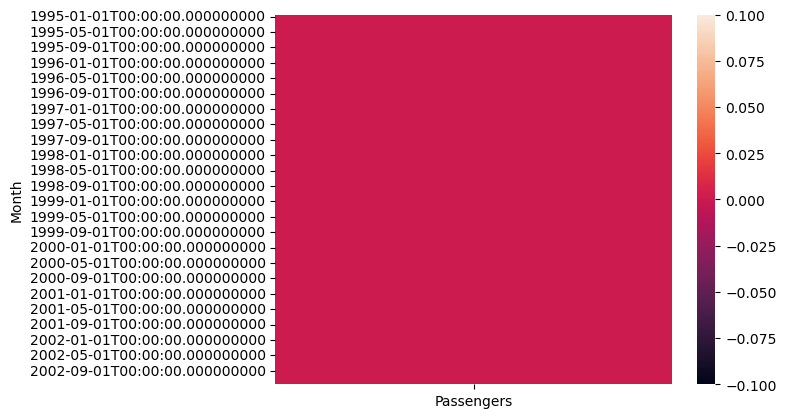

In [67]:
sns.heatmap(airlines.isnull())

In [5]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [6]:
airlines.index.freq='MS'

# visulaize the data

In [8]:
from statsmodels.tsa.seasonal import STL,seasonal_decompose

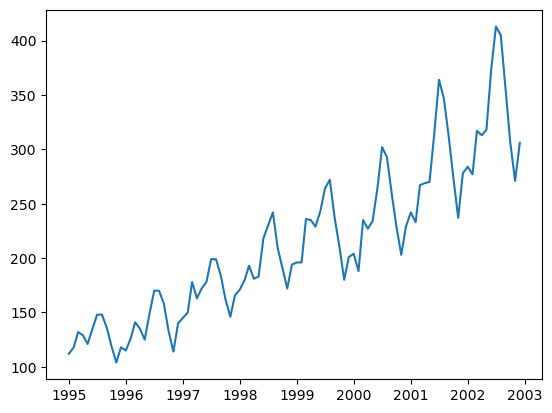

In [9]:
plt.plot(airlines)

[]

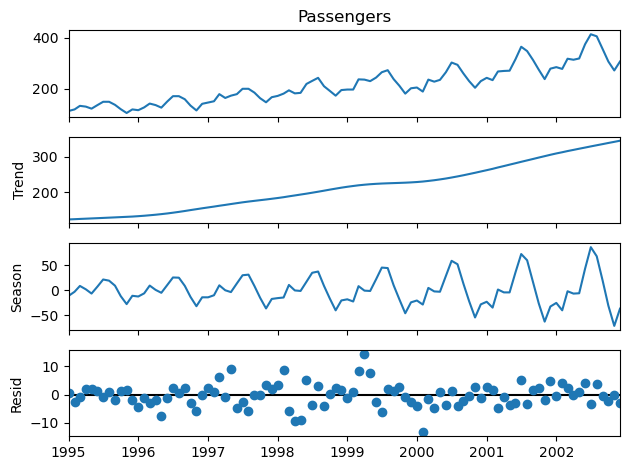

In [10]:
endog=airlines['Passengers']
res=STL(endog).fit()
res.plot()
plt.plot()

In [11]:
train_lenght=int(len(airlines)*0.75)
test_lenght=len(airlines)-train_lenght
train_lenght,test_lenght

(72, 24)

# Buil the simple Exponential smoothing

In [13]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [14]:
train_data=airlines.iloc[:train_lenght]
train_data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2000-08-01,293
2000-09-01,259
2000-10-01,229


In [15]:
test_data=airlines.iloc[train_lenght:]
test_data

,Passengers
Month,
2001-01-01,242
2001-02-01,233
2001-03-01,267
2001-04-01,269
2001-05-01,270
2001-06-01,315
2001-07-01,364
2001-08-01,347
2001-09-01,312


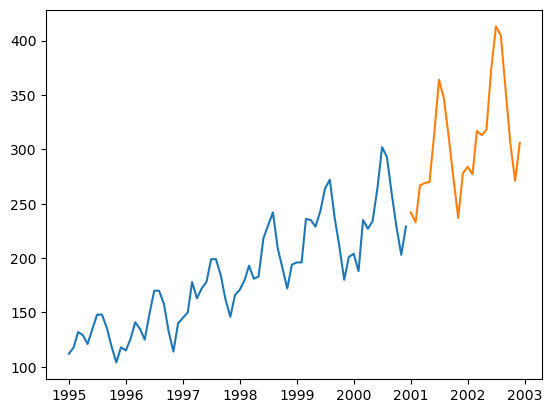

In [16]:
plt.plot(train_data)
plt.plot(test_data)

In [17]:
ses_model=SimpleExpSmoothing(train_data['Passengers']).fit(smoothing_level=0.2)

C:\Users\santh\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [18]:
test_result=test_data.copy()

In [19]:
test_result['SES_model']=ses_model.forecast(test_lenght)

In [20]:
test_result.head()

,Passengers,SES_model
Month,,
2001-01-01,242,237.974268
2001-02-01,233,237.974268
2001-03-01,267,237.974268
2001-04-01,269,237.974268
2001-05-01,270,237.974268


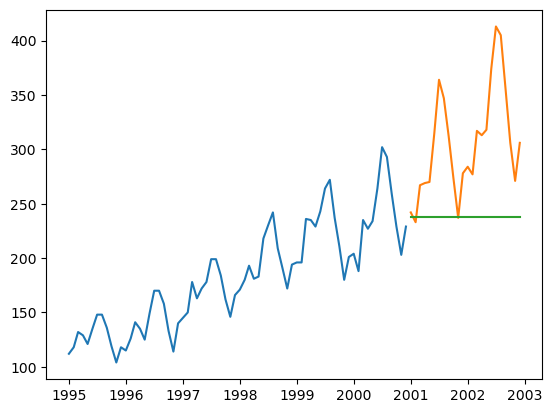

In [21]:
plt.plot(train_data)
plt.plot(test_data)
plt.plot(test_result['SES_model'])
plt.show()

In [22]:
mse=mean_squared_error(test_data['Passengers'],test_result['SES_model'])
rmse=np.sqrt(mse)
mae=mean_absolute_error(test_data['Passengers'],test_result['SES_model'])
mape=mean_absolute_percentage_error(test_data['Passengers'],test_result['SES_model'])

In [23]:
test_metrics=pd.DataFrame(index=['MSE','RMSE','MAE','MAPE'])
test_metrics['SES_model']=[mse,rmse,mae,mape]
test_metrics

,SES_model
MSE,6997.881659
RMSE,83.653342
MAE,68.646443
MAPE,0.205919


# Double Exponential Smoothing

In [25]:
desadd_model=ExponentialSmoothing(train_data['Passengers'],trend='add').fit()

In [26]:
test_result['DES_add']=desadd_model.forecast(test_lenght)

In [27]:
test_result.head()

,Passengers,SES_model,DES_add
Month,,,
2001-01-01,242,237.974268,230.691016
2001-02-01,233,237.974268,232.382517
2001-03-01,267,237.974268,234.074018
2001-04-01,269,237.974268,235.765519
2001-05-01,270,237.974268,237.457021


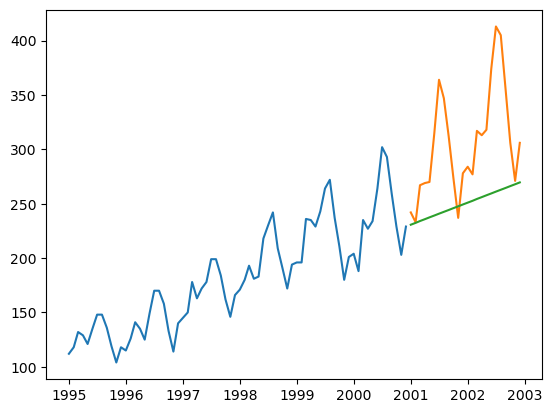

In [28]:
plt.plot(train_data)
plt.plot(test_data)
plt.plot(test_result['DES_add'])
plt.show()

# metrics for Des_add

In [30]:
mse=mean_squared_error(test_data['Passengers'],test_result['DES_add'])
rmse=np.sqrt(mse)
mae=mean_absolute_error(test_data['Passengers'],test_result['DES_add'])
mape=mean_absolute_percentage_error(test_data['Passengers'],test_result['DES_add'])

In [31]:

test_metrics['DES_add']=[mse,rmse,mae,mape]
test_metrics

,SES_model,DES_add
MSE,6997.881659,5062.761521
RMSE,83.653342,71.153085
MAE,68.646443,56.865556
MAPE,0.205919,0.169917


In [32]:
desmul_model=ExponentialSmoothing(train_data['Passengers'],trend='mul').fit()

In [33]:
test_result['DES_mul']=desmul_model.forecast(test_lenght)

In [34]:
test_result.head()

,Passengers,SES_model,DES_add,DES_mul
Month,,,,
2001-01-01,242,237.974268,230.691016,229.617770
2001-02-01,233,237.974268,232.382517,230.319547
2001-03-01,267,237.974268,234.074018,231.023469
2001-04-01,269,237.974268,235.765519,231.729542
2001-05-01,270,237.974268,237.457021,232.437773


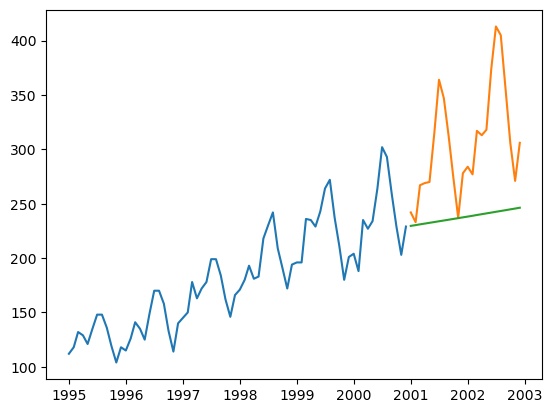

In [35]:
plt.plot(train_data)
plt.plot(test_data)
plt.plot(test_result['DES_mul'])
plt.show()

# metrics for Des_mul

In [37]:
mse=mean_squared_error(test_data['Passengers'],test_result['DES_mul'])
rmse=np.sqrt(mse)
mae=mean_absolute_error(test_data['Passengers'],test_result['DES_mul'])
mape=mean_absolute_percentage_error(test_data['Passengers'],test_result['DES_mul'])

In [38]:
test_metrics['DES_mul']=[mse,rmse,mae,mape]
test_metrics

,SES_model,DES_add,DES_mul
MSE,6997.881659,5062.761521,6796.998343
RMSE,83.653342,71.153085,82.443910
MAE,68.646443,56.865556,68.252977
MAPE,0.205919,0.169917,0.205466


# triple Exponential  Smoothing

In [40]:
tesadd_model=ExponentialSmoothing(train_data['Passengers'],trend='add',seasonal='add').fit()

In [41]:
test_result['TES_add']=tesadd_model.forecast(test_lenght)
test_result.head()

,Passengers,SES_model,DES_add,DES_mul,TES_add
Month,,,,,
2001-01-01,242,237.974268,230.691016,229.617770,230.654423
2001-02-01,233,237.974268,232.382517,230.319547,233.154024
2001-03-01,267,237.974268,234.074018,231.023469,259.320552
2001-04-01,269,237.974268,235.765519,231.729542,251.820418
2001-05-01,270,237.974268,237.457021,232.437773,250.820100


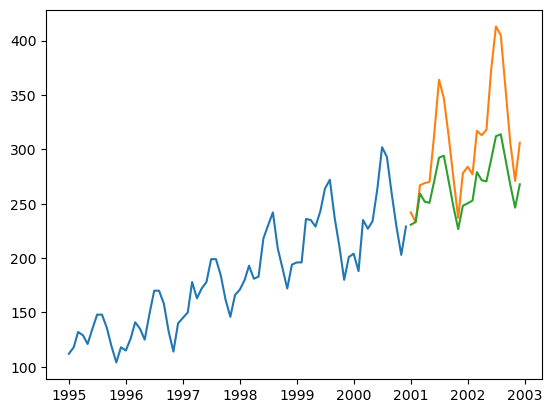

In [42]:
plt.plot(train_data)
plt.plot(test_data)
plt.plot(test_result['TES_add'])
plt.show()

# metric for TSE_add

In [44]:
mse=mean_squared_error(test_data['Passengers'],test_result['TES_add'])
rmse=np.sqrt(mse)
mae=mean_absolute_error(test_data['Passengers'],test_result['TES_add'])
mape=mean_absolute_percentage_error(test_data['Passengers'],test_result['TES_add'])

In [45]:
test_metrics['TES_add']=[mse,rmse,mae,mape]
test_metrics

,SES_model,DES_add,DES_mul,TES_add
MSE,6997.881659,5062.761521,6796.998343,2262.980603
RMSE,83.653342,71.153085,82.443910,47.570796
MAE,68.646443,56.865556,68.252977,39.883236
MAPE,0.205919,0.169917,0.205466,0.120850


In [46]:
tesmul_model=ExponentialSmoothing(train_data['Passengers'],trend='mul',seasonal='mul').fit()

C:\Users\santh\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [47]:
test_result['TES_mul']=tesadd_model.forecast(test_lenght)
test_result.head()

,Passengers,SES_model,DES_add,DES_mul,TES_add,TES_mul
Month,,,,,,
2001-01-01,242,237.974268,230.691016,229.617770,230.654423,230.654423
2001-02-01,233,237.974268,232.382517,230.319547,233.154024,233.154024
2001-03-01,267,237.974268,234.074018,231.023469,259.320552,259.320552
2001-04-01,269,237.974268,235.765519,231.729542,251.820418,251.820418
2001-05-01,270,237.974268,237.457021,232.437773,250.820100,250.820100


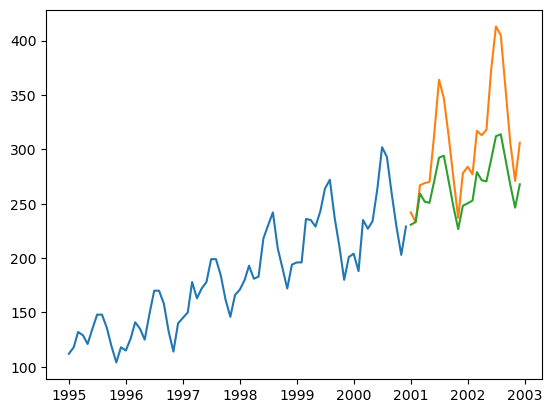

In [48]:
plt.plot(train_data)
plt.plot(test_data)
plt.plot(test_result['TES_mul'])
plt.show()

# metric for Tes_mul

In [51]:
mse=mean_squared_error(test_data['Passengers'],test_result['TES_mul'])
rmse=np.sqrt(mse)
mae=mean_absolute_error(test_data['Passengers'],test_result['TES_mul'])
mape=mean_absolute_percentage_error(test_data['Passengers'],test_result['TES_mul'])

In [52]:
test_metrics['TES_mul']=[mse,rmse,mae,mape]
test_metrics

,SES_model,DES_add,DES_mul,TES_add,TES_mul
MSE,6997.881659,5062.761521,6796.998343,2262.980603,2262.980603
RMSE,83.653342,71.153085,82.443910,47.570796,47.570796
MAE,68.646443,56.865556,68.252977,39.883236,39.883236
MAPE,0.205919,0.169917,0.205466,0.120850,0.120850


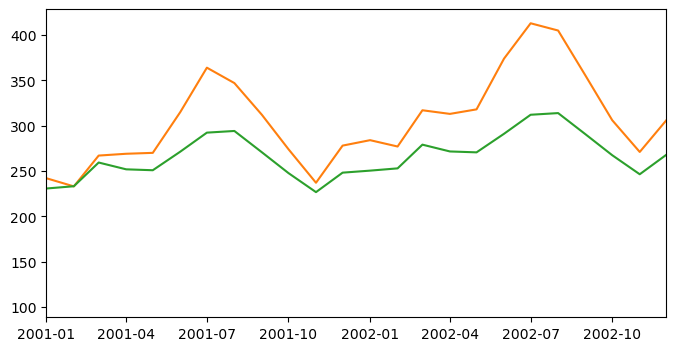

In [55]:
plt.figure(figsize=(8,4))
plt.plot(train_data)
plt.plot(test_data)
plt.plot(test_result['TES_mul'])
plt.xlim(['2001-01-01','2002-12-01'])
plt.show()

# build the final model

In [61]:
final_model=ExponentialSmoothing(airlines['Passengers'],trend='mul',seasonal='mul').fit()

C:\Users\santh\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [62]:
forecast_value=final_model.forecast(test_lenght)

In [63]:
forecast_value

2003-01-01    315.020860
2003-02-01    311.710092
2003-03-01    361.242219
2003-04-01    352.911724
2003-05-01    354.367837
2003-06-01    403.885545
2003-07-01    450.864589
2003-08-01    445.627337
2003-09-01    395.607920
2003-10-01    347.205801
2003-11-01    304.942016
2003-12-01    348.184632
2004-01-01    357.251641
2004-02-01    353.497041
2004-03-01    409.669301
2004-04-01    400.222044
2004-05-01    401.873359
2004-06-01    458.029268
2004-07-01    511.306185
2004-08-01    505.366843
2004-09-01    448.641968
2004-10-01    393.751201
2004-11-01    345.821657
2004-12-01    394.861252
Freq: MS, dtype: float64

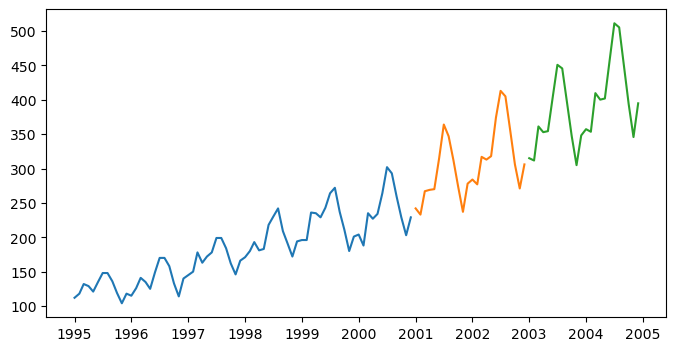

In [64]:
plt.figure(figsize=(8,4))
plt.plot(train_data)
plt.plot(test_data)
plt.plot(forecast_value)
plt.show()